<img src="https://github.com/alan-barzilay/NLPortugues/blob/master/imagens/logo_nlportugues.png?raw=true"  style="height:65%" align="right">


# Lista 9 -  Convoluções
**Nome:** André Barbosa

**Numero Usp:** 7971751









______________




O objetivo desta lista é fazer com que vocês se familiarizem com redes convolucionais, vocês ja tiveram um contato breve com essa arquitetura algumas listas atrás mas dessa vez vocês cuidarão sozinhos da implementação e deverão tomar medidas para evitar overfitting. Novamente, as questões 1 2 e 3 podem ser copiadas de listas anteriores.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importando os dados como um dataframe

Para esta lista nós utilizaremos o dataset **B2W-Reviews01** que consiste em avaliações de mais de 130k compras online no site Americanas.com e [esta disponivel no github](https://github.com/b2wdigital/b2w-reviews01) sob a licensa CC BY-NC-SA 4.01.

In [2]:
b2wCorpus = pd.read_csv("data/b2w-10k.csv")
b2wCorpus.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958,F,RJ,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996,M,SC,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984,M,SP,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985,F,SP,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994,M,MG,NaN,NaN,NaN,NaN,NaN


In [3]:
b2wCorpus["review_text"]

0       Estou contente com a compra entrega rápida o ú...
1       Por apenas R$1994.20,eu consegui comprar esse ...
2       SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3       MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4       A entrega foi no prazo, as americanas estão de...
                              ...                        
9994    Celular muito rápido, com processador e armaze...
9995    achei o produto muito frágil, o material veio ...
9996    Uma porcaria pois ñ recebi ñ recomendo pra nin...
9997    Maquina excelente,super pratica. recomendo.ent...
9998    Agradeço pelo compromisso, obrigado. ,...........
Name: review_text, Length: 9999, dtype: object


### Pré-processamento
Seria util nos livrarmos das colunas que não são relevantes para o nosso problema e tambem verificar se não tem nada de esquisito nas colunas que vamos utilizar. 
Por exemplo, se fossemos utilizar a coluna "reviewer_gender" nós precisariamos nos livrar desses valores esquisitos:

In [4]:
b2wCorpus["reviewer_gender"].value_counts()

M                                                                         5033
F                                                                         4624
1970                                                                         1
                                                                             1
Ocorrência: Z-Devolução Em Andamento Ao Cd de São Paulo 22/12/17 16:12       1
Name: reviewer_gender, dtype: int64

## <font color='blue'>Questão 1 </font>

a) Selecione apenas as colunas relevantes: "review_text" e "recommend_to_a_friend". 

b) Converta a coluna "recommend_to_a_friend" de uma coluna de `str` para uma coluna de `int`:

- "Yes"-> 1
- "No" -> 0


In [5]:
# Seu código aqui
import pandas as pd
from sklearn.model_selection import train_test_split

df = b2wCorpus[["review_text", "recommend_to_a_friend"]].copy()
df["recommend_to_a_friend"] = df["recommend_to_a_friend"].map({"Yes": 1, "No": 0})

### Separando em teste e treino
## <font color='blue'>Questão 2 </font>

Agora com o dataset já pré-processado, separe o em 2 partes, um conjunto de teste e um conjunto de treino. Novamente você pode utilizar a função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn como na lista passada.

In [6]:
# Seu código aqui
X_train, X_test, y_train, y_test = train_test_split(
    df[["review_text"]], df[["recommend_to_a_friend"]], random_state=42, test_size=0.2
)

### Tokenizando

Para alimentarmos os reviews a camada de embedding nós precisamos quebrar cada review em uma serie de tokens. Existem diversas maneiras de se realizar isso e poderiamos até mesmo usar outras bibliotecas como o spaCy. 

Por exemplo, o objeto [`Tokenizer`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) oferece um método `tokenize` para quebrar as palavras em tokens individuais ao mesmo tempo que filtra caracteres indesejados (por default os caracteres filtrados são: !"#$\%&()*+,-./:;<=>?@[\\]^_\`{|}~\t\n).


Para essa lista utilizaremos a camada [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) para automaticamente passar os reviews para caixa-baixa, extrair caracteres especiais e tokenizar as palavras de maneira a serem passadas para a camada de embedding. Ao tornarmos a etapa de tokenização uma camada de rede neural nós podemos incluir esse processamento dos reviews no proprio modelo.


## <font color='blue'>Questão 3 </font>
Utilizando a camada `TextVectorization` tokenize os inputs.
Declare a camada e então chame a função `adapt()` para adequar o seu vocabulário aos reviews.

Não se esqueça de se certificar que todas os reviews tenham o mesmo comprimento, seja por meio do uso de padding, truncamento ou uma mistura dos dois. Plotamos um histograma do comprimento dos reviews para lhe auxiliar nessa decisão.

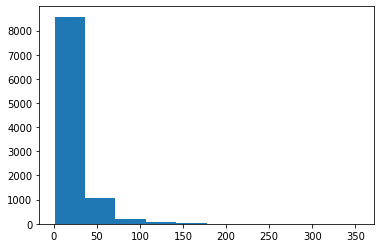

In [7]:
plt.hist([len(linha.split()) for linha in b2wCorpus["review_text"]])
plt.show()

In [8]:
# Seu código aqui
maxlen=120
tokenizer_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    standardize='lower_and_strip_punctuation',
    split='whitespace', ngrams=None, output_mode="int",
    output_sequence_length=maxlen, pad_to_max_tokens=True)
tokenizer_layer.adapt(X_train.values)

### Montando o modelo

Agora vamos juntar a camada do tokenizador a nossa camada [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) e definir o resto de nosso modelo.

##  <font color='blue'>Questão 4 </font>

Defina seu modelo.

Como analise de sentimentos pode ser visto como um problema de classificação, é interessante também registrar algumas métricas como acurácia `metrics=["acc"]` .

Seu modelo deve começar com a seguinte estrutura:
 - Camada de Input
 - Camada de Tokenização
 - Camada de Embedding
 
Já definimos as camadas seguintes da rede por você.
 
Atenção a dimensão do input da camada de embedding, lembre se que < OOV > e < PAD > possuem seus próprios tokens.


In [9]:
# Seu código aqui
VOCAB_SIZE = len(tokenizer_layer.get_vocabulary()) + 2  # OOV + PAD
embed_dim = 64  # tamanho do Embedding de cada token

inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string, name="input_text")
embedding_layer = tf.keras.layers.Embedding(VOCAB_SIZE, embed_dim)
conv1d = tf.keras.layers.Conv1D(
    filters=32, kernel_size=1, padding="same", activation="relu"
)
maxpool = tf.keras.layers.GlobalAveragePooling1D()
x = tokenizer_layer(inputs)
x = embedding_layer(x)
x = conv1d(x)
x = maxpool(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_text (InputLayer)      [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 120)               0         
_________________________________________________________________
embedding (Embedding)        (None, 120, 64)           848448    
_________________________________________________________________
conv1d (Conv1D)              (None, 120, 32)           2080      
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66    

### Treinando e avaliando seu modelo

##  <font color='blue'>Questão 5 </font>

Com seu modelo definido, treine e avalie sua performance no conjunto de testes, utilize camadas [Conv1D](https://keras.io/api/layers/convolution_layers/convolution1d/) na sua rede.



In [11]:
# Seu código aqui
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]
model.compile(opt, "sparse_categorical_crossentropy", metrics=["acc"])
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=my_callbacks,
)

Epoch 1/20
250/250 [==============================] - 4s 15ms/step - loss: 0.5187 - acc: 0.7572 - val_loss: 0.4329 - val_acc: 0.7910
Epoch 2/20
250/250 [==============================] - 3s 12ms/step - loss: 0.3972 - acc: 0.8206 - val_loss: 0.3194 - val_acc: 0.8795
Epoch 3/20
250/250 [==============================] - 3s 13ms/step - loss: 0.3018 - acc: 0.8790 - val_loss: 0.2705 - val_acc: 0.8985
Epoch 4/20
250/250 [==============================] - 3s 12ms/step - loss: 0.2609 - acc: 0.8992 - val_loss: 0.2497 - val_acc: 0.8970
Epoch 5/20
250/250 [==============================] - 3s 12ms/step - loss: 0.2372 - acc: 0.9130 - val_loss: 0.2462 - val_acc: 0.9095
Epoch 6/20
250/250 [==============================] - 3s 13ms/step - loss: 0.2218 - acc: 0.9202 - val_loss: 0.2407 - val_acc: 0.9105
Epoch 7/20
250/250 [==============================] - 3s 12ms/step - loss: 0.2099 - acc: 0.9279 - val_loss: 0.2407 - val_acc: 0.9125
Epoch 8/20
250/250 [==============================] - 3s 12ms/step - 